# Kave Ar-Ge Sınav Soru 1

## İşe alım Robotu 

> Burada `...` ile eksik bırakılan kod parçalarını doldurmanız gerekmektedir. Aşağıdaki bölümde işe alım robotunun nasıl çalıştığı anlatılacaktır. Başarılar dileriz.


## Sorular

Daha önce ETX şirketine başvuran 1000 adaydan 100'ü işe alınmış olsun. Her adayın 4 özelliği olsun, ama sadece iki özelliği işe alınma için gerçekten ayırt edici olsun.

Özellikler
 - __Önemli__ : Social Skills, Knowledge in algorithms
 - __Önemsiz__ : GPA, Age
 
Bu özelliklerin tümünün 0 ile 5 arasında değer aldığını kabul ediyoruz. 
 
İşe alınanlar
 - Social Skills ve Knowledge in algorithms 5 üzerinden 5e yakın rastgele sayilar
 - Diğer özellikler GPA, Age önemli değil
 
İşe alınmayanlar ise
 - Social Skills ve Knowledge in algorithms 5 üzerinden 1e yakın rastgele sayilar
 - Diğer özellikler GPA, Age önemli değil

Öncelikle bu veri setini yaratalm

## Kutuphaneler

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(2019)

## Rastgele sayi uretme

Belirlenen min ve max degeri arasinda ortalaması mu olan, standart sapması 1 olan normal dagilimdan sayi uretme.

In [2]:
np.random.randn()

-0.21767896374028844

In [3]:
def generate(mu = None, minval = 0, maxval = 5):
    # Eger mu None ise, mu degeri minval ve maxval in ortalaması olsun
    if mu == None:
        mu = (minval + maxval)/2
    
    # val ortalaması mu olan, standart sapması 1 olan normal dagilimdan rastgele sayi 
    val = mu + np.random.randn()
    
    # Eger val, maxval'den buyukse veye minval'den kucukse, sayıyı tekrar uret
    while val <  minval or val > maxval:
        val = mu + np.random.randn()
    return val

In [12]:
#[generate(mu = 5) for i in range(100)]

## Basarili adaylar

 - Basarili adaylarin onemli ozelliklerini uretelim
 
#### İşe alınan başarılı adayların özellikleri

Yukarıdaki `generate` fonksiyonu ile verimizi olusturalım.

 - Social Skills ve Knowledge in algorithms 5 üzerinden 5e yakın rastgele sayilar
 - Diğer özellikler GPA, Age önemli değil

### Basarisiz Adaylar

#### İşe alınmayan başarısız adayların özellikleri ise
 - Social Skills ve Knowledge in algorithms 5 üzerinden 1e yakın rastgele sayilar
 - Diğer özellikler GPA, Age önemli değil

# Veri Setini olusturalim

Başarılı Adaylar
> Ilk yüz kişi başarılı, 
 - target = 1
 - Social Skills ve Knowledge in algorithms 5 üzerinden 5e yakın rastgele sayilar
 - GPA ve AGE, 0 ve 5 arasinda rastgele sayilar

Başarısız Adaylar
> Geri kalan 900 kişi başarısız
 - target = 0
 - Social Skills ve Knowledge in algorithms 5 üzerinden 1e yakın rastgele sayilar
 - GPA ve AGE, 0 ve 5 arasinda rastgele sayilar

In [15]:
# 1 basarili , 0 basarisiz
target = [1 for i in range(100)] + [0 for i in range(900)]

social_skills = [generate(mu = 5) for i in range(100)] + [generate(mu = 0) for i in range(900)]
algorithm_knowledge = [generate(mu = 5) for i in range(100)] + [generate(mu = 0) for i in range(900)]
GPA = [generate() for i in range(1000)]
Age = [generate() for i in range(1000)]

Veri dictionary'si oluşturalım ardından, verimizi pandas dataframe'e dönüştürelim

In [16]:
datadict = {"social":social_skills, "algorithm":algorithm_knowledge, "gpa":GPA, "age":Age, "y":target}
data = pd.DataFrame.from_dict(datadict)

ilk 7 veri

In [18]:
data.head(3)

,age,algorithm,gpa,social,y
0,3.576113,3.728920,0.930603,4.438372,1
1,1.829891,4.393183,3.137649,4.831307,1
2,3.981593,4.050717,3.886304,4.865860,1


son 7 veri

In [19]:
data.tail(7)

,age,algorithm,gpa,social,y
993,2.453036,0.565968,3.777191,2.009570,0
994,2.123047,1.228910,2.722686,0.068741,0
995,0.756427,0.931875,2.769794,0.218749,0
996,3.344518,1.182757,2.696908,0.735196,0
997,1.812786,1.081876,2.940970,1.076683,0
998,2.316372,2.211849,4.594402,0.614308,0
999,1.845348,1.809162,3.783898,0.629247,0


Veri Özellikleri

In [20]:
data.describe()

,age,algorithm,gpa,social,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2.506552,1.142294,2.478164,1.119201,0.10000
std,0.933852,1.166549,0.955431,1.205874,0.30015
min,0.169161,0.001856,0.015277,0.000226,0.00000
25%,1.840241,0.357481,1.792158,0.335675,0.00000
50%,2.497762,0.804020,2.453376,0.735752,0.00000
75%,3.143272,1.392457,3.177979,1.320079,0.00000
max,4.835984,4.985244,4.906796,4.996092,1.00000


## Veriyi kaydet

In [22]:
data.to_csv("data-f.csv", index=False)

## Veriyi Oku

In [23]:
import requests
import io


url = "https://raw.githubusercontent.com/uzay00/KaVe-Egitim/master/ARGE/Sorular/1-İseAlımRobotu/data.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

SSLError: EOF occurred in violation of protocol (_ssl.c:749)

## Veriyi Ciz

In [32]:
data[data.y == 0].shape

(900, 5)

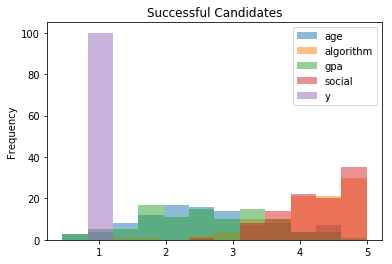

In [44]:
ax = data[data.y == 1].plot.hist(bins=12, alpha=0.5)
plt.title("Successful Candidates")
plt.show()

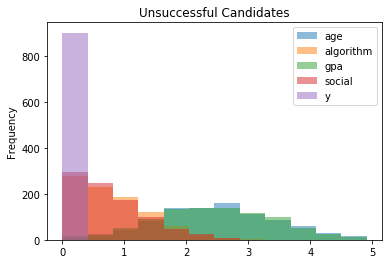

In [48]:
ax = data[data.y == 0].plot.hist(bins=12, alpha=0.5)
plt.title("Unsuccessful Candidates")
plt.show()

## Iki boyutlu Cizim
Verinin sadece algoritma ve yas kategorisini cizdir

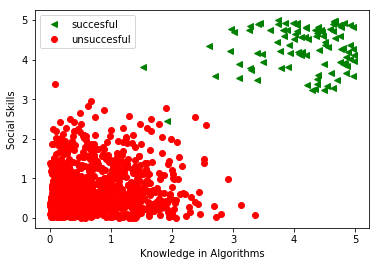

In [59]:
plt.plot(data[data.y == 1].algorithm, data[data.y == 1].social, 
         'g<', label = 'succesful')
plt.plot(data[data.y == 0].algorithm, data[data.y == 0].social, 
         'ro', label = 'unsuccesful')

plt.xlabel("Knowledge in Algorithms")
plt.ylabel("Social Skills")
plt.legend()
plt.show()

In [60]:
data.head()

,age,algorithm,gpa,social,y
0,3.576113,3.728920,0.930603,4.438372,1
1,1.829891,4.393183,3.137649,4.831307,1
2,3.981593,4.050717,3.886304,4.865860,1
3,1.734623,4.605488,2.605315,3.663224,1
4,2.759050,4.288383,1.894925,3.238931,1


In [61]:
type(data)

pandas.core.frame.DataFrame

In [62]:
data.shape

(1000, 5)

In [64]:
type(data.values)

numpy.ndarray

In [65]:
M = data.values
M

array([[3.5761132 , 3.72892034, 0.93060321, 4.43837203, 1.        ],
       [1.82989065, 4.39318298, 3.13764934, 4.83130749, 1.        ],
       [3.98159303, 4.05071661, 3.88630403, 4.86585961, 1.        ],
       ...,
       [1.81278649, 1.08187599, 2.94096983, 1.07668257, 0.        ],
       [2.31637186, 2.21184896, 4.59440187, 0.61430823, 0.        ],
       [1.8453481 , 1.80916171, 3.78389764, 0.62924677, 0.        ]])

## Veri Matrisini Olusuturalim

### X 
$[1000, 4]$ boyutlu
 - Verinin ilk 4 kolonu, adaylarin bilgilerini içeriyor

### y 
$[1000, 1]$ boyutlu
 - Verinin son kolonu, kabul ya da red bilgisini içeriyor


In [73]:
# numpy e donustur
M = data.values

# butun colonlar, son y kolonu haric
X = M[:,:-1]
# son y ise target
y = M[:,-1]

In [74]:
X

array([[3.5761132 , 3.72892034, 0.93060321, 4.43837203],
       [1.82989065, 4.39318298, 3.13764934, 4.83130749],
       [3.98159303, 4.05071661, 3.88630403, 4.86585961],
       ...,
       [1.81278649, 1.08187599, 2.94096983, 1.07668257],
       [2.31637186, 2.21184896, 4.59440187, 0.61430823],
       [1.8453481 , 1.80916171, 3.78389764, 0.62924677]])

## Veriyi Normalize et

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# her feature (kolon) normalize ediliyor
scaler.fit(X)
X = scaler.transform(X)
X

array([[0.73003669, 0.74789765, 0.18712517, 0.88836361],
       [0.35585869, 0.88119303, 0.63832366, 0.96701573],
       [0.81692231, 0.81247144, 0.79137523, 0.97393188],
       ...,
       [0.35219363, 0.21672402, 0.5981154 , 0.21546938],
       [0.46010117, 0.44347196, 0.93613554, 0.122918  ],
       [0.35917089, 0.36266604, 0.77043973, 0.12590818]])

# [Oklid Temelli] İşe Alım Algoritması

yeni_adaylar matrisindeki adaylari tek tek degerlendirecegiz
 - adayi al
 - nomalize et
 - X matrisi ile Oklid mesafesini hesapla
 - en yakin k = 5 komusuyu bul
 - Bu komusularin yaridan fazlasi kabul almis ise, bu adayi da kabul et yoksa red
 
```
if np.mean(y[benzerler]) > 0.5:
    print("kabul")
else:
    print("red")
```

In [77]:
yeni_adaylar = np.array([[5, 5, 5, 5],
                         [5, 5, 4, 4],
                         [5, 5, 3, 3],
                         [5, 5, 2, 2],
                         [5, 5, 1, 1],
                         [5, 5, 0, 0],
                         [0, 0, 1, 1],
                         [0, 0, 2, 2],
                         [0, 0, 3, 3],
                         [0, 0, 4, 4],
                         [0, 0, 5, 5],
                         [1, 2, 3, 4],
                         [1, 1, 2, 3],
                         [1, 2, 3, 4],
                         [2, 2, 4, 4]])

In [78]:
yeni_adaylar.shape

(15, 4)

In [82]:
yeni_adaylar[0].reshape(1,-1).shape

(1, 4)

In [87]:
i = -1
aday = yeni_adaylar[i].reshape(1,-1)
aday = scaler.transform(aday)
aday

array([[0.39230947, 0.40096093, 0.81461872, 0.80061666]])

In [86]:
scaler.inverse_transform(aday)

array([[2., 2., 4., 4.]])

In [92]:
# X ile Farkini al
D = X - aday
D

array([[ 0.33772722,  0.34693672, -0.62749354,  0.08774695],
       [-0.03645078,  0.4802321 , -0.17629505,  0.16639907],
       [ 0.42461284,  0.41151051, -0.02324349,  0.17331522],
       ...,
       [-0.04011584, -0.1842369 , -0.21650332, -0.58514728],
       [ 0.0677917 ,  0.04251103,  0.12151682, -0.67769866],
       [-0.03313858, -0.03829489, -0.04417899, -0.67470848]])

In [94]:
# Farkin karesi
D2 = D**2
D2

array([[0.11405968, 0.12036509, 0.39374815, 0.00769953],
       [0.00132866, 0.23062287, 0.03107995, 0.02768865],
       [0.18029607, 0.1693409 , 0.00054026, 0.03003816],
       ...,
       [0.00160928, 0.03394324, 0.04687369, 0.34239733],
       [0.00459571, 0.00180719, 0.01476634, 0.45927548],
       [0.00109817, 0.0014665 , 0.00195178, 0.45523154]])

In [99]:
mesafe = D2.sum(axis = 1)

In [103]:
# kucukten buyuge sirala
mesafe.argsort()[:5]

array([677,  43,  19,  22,  14])

In [106]:
np.mean(y[mesafe.argsort()[:5]])

0.8

In [101]:
np.argsort?

In [109]:
def ise_alim(yeni = 0, k = 5):
    # Yeni aday matrisinden adaylari sec 
    aday = yeni_adaylar[yeni].reshape(1,-1)
    # Transfrom et
    aday = scaler.transform(aday)
    # X ile Farkini al
    D = X - aday
    # Farkin karesi
    D2 = D**2
    # Oklid mesafesini hesapla
    mesafe = D2.sum(axis = 1)
    # Mesafeleri buyukten kucuge sirala, en kucuk k komsunun indeksi
    k_komsu = mesafe.argsort()[:k]

    if np.mean(y[k_komsu]) > 0.5: 
        print(scaler.inverse_transform(aday), ">> Kabul")
    else:
        print(scaler.inverse_transform(aday), ">>red")

In [110]:
for i in range(yeni_adaylar.shape[0]):
    ise_alim(yeni = i, k = 5)

[[5. 5. 5. 5.]] >> Kabul
[[5. 5. 4. 4.]] >> Kabul
[[5. 5. 3. 3.]] >> Kabul
[[5. 5. 2. 2.]] >> Kabul
[[5. 5. 1. 1.]] >>red
[[5. 5. 0. 0.]] >>red
[[0. 0. 1. 1.]] >>red
[[0. 0. 2. 2.]] >>red
[[0. 0. 3. 3.]] >>red
[[0. 0. 4. 4.]] >>red
[[0. 0. 5. 5.]] >>red
[[1. 2. 3. 4.]] >> Kabul
[[1. 1. 2. 3.]] >>red
[[1. 2. 3. 4.]] >> Kabul
[[2. 2. 4. 4.]] >> Kabul


In [122]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=2)

X_test = scaler.transform(yeni_adaylar)
model.fit(X,y)
model.predict(X_test)

array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])

In [123]:
X.shape, y.shape

((1000, 4), (1000,))

In [124]:
X

array([[0.73003669, 0.74789765, 0.18712517, 0.88836361],
       [0.35585869, 0.88119303, 0.63832366, 0.96701573],
       [0.81692231, 0.81247144, 0.79137523, 0.97393188],
       ...,
       [0.35219363, 0.21672402, 0.5981154 , 0.21546938],
       [0.46010117, 0.44347196, 0.93613554, 0.122918  ],
       [0.35917089, 0.36266604, 0.77043973, 0.12590818]])

In [125]:
yeni_adaylar

array([[5, 5, 5, 5],
       [5, 5, 4, 4],
       [5, 5, 3, 3],
       [5, 5, 2, 2],
       [5, 5, 1, 1],
       [5, 5, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 2, 2],
       [0, 0, 3, 3],
       [0, 0, 4, 4],
       [0, 0, 5, 5],
       [1, 2, 3, 4],
       [1, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 2, 4, 4]])

In [126]:
model.coef_

array([[-1.10064359,  4.67572898, -1.10396533,  5.17621699]])

In [127]:
data.columns

Index(['age', 'algorithm', 'gpa', 'social', 'y'], dtype='object')

# [Korelasyon Temelli] İşe Alım Algoritması

yeni_adaylar matrisindeki adaylari tek tek degerlendirecegiz
 - adayi al, aday vektorunu kendi boyuna bol
 - X matrisini nomalize et, X'teki her bir satır vektörünü kendi boyuna böl 
 - X matrisi ile korelasyon temelli benzerligi hesapla
 - en yakin k = 5 benzer komusuyu bul
 - Bu komusularin yaridan fazlasi kabul almis ise, bu adayi da kabul et yoksa red

In [ ]:
# vektorunu kendi boyuna bolen anonim fonksiyon
nomalize = lambda X: X/((X**...).sum(axis = ...).reshape(...,...))**...

In [ ]:
A = nomalize(yeni_adaylar)
A

In [ ]:
C = nomalize(X)

In [ ]:
C

In [ ]:
# C matrisi ile A matrisinin vektör çarpımını al
B = ....dot(...)
B

 - en yakin k = 5 benzer komusuyu bul
 - Bu komusularin yaridan fazlasi kabul almis ise, bu adayi da kabul et yoksa red

In [ ]:
alim = lambda a : "Kabul" if a else "Red"

[(yeni_adaylar[i, :], alim(...) > 0.5)) for i in range(A.shape[0])]